In [5]:
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import geopandas as gpd

import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('terrain')
new_cmap = truncate_colormap(cmap, 0.2, .9)

In [2]:
stations = pd.read_csv('/home/clc/Desktop/instrument_textbook_BLcourse_spring2025(BL instruments).csv', skipfooter=2)
stations

/tmp/ipykernel_31797/2711464749.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  stations = pd.read_csv('/home/clc/Desktop/instrument_textbook_BLcourse_spring2025(BL instruments).csv', skipfooter=2)


,Station name,Category,Setup by group,Quantities measured,LAT (dec deg),LON (dec deg),elevation from GPS (masl),elevation from DEM (masl),Th height (m),Anemometer height (m),CEB orientation (Tg),Setup time (UTC),Unnamed: 12
0,Layla,AWS-P,3,"T, Ws, Wd, Tg, P",78.172686,16.010102,186 (NOT ACCURATE),NaN,1.82,2.09,NE,1/26/2025 12:25,NaN
1,TH3,Tinytag,3,"T, Rh",78.181669,15.908088,181 (NOT ACCURATE),NaN,1.40,NaN,NaN,1/26/2025 13:30:00 PM,NaN
2,TH2,Tinytag,3,"T, Rh",78.212169,15.756418,160 (NOT ACCURATE),NaN,1.65,NaN,NaN,1/26/2025 13:45:00 PM,NaN
3,Tom Joad,AWS,3,"T, Ws, Wd, Tg",78.226178,15.650295,NaN,NaN,1.90,2.21,N,1/26/2025 15:30:00 PM,NaN
4,Rosanna,AWS-P,3,"T, Ws, Wd, Tg, P",78.239350,15.749290,NaN,NaN,1.68,2.05,NE,1/27/2025 11:30,NaN
5,TH5,Tinytag,3,"T, Rh",78.223609,15.797014,NaN,NaN,1.65,NaN,NaN,1/27/2025 12:10,NaN
6,Bette Davis,AWS,3,"T, Ws, Wd, Tg",78.213555,15.857184,53 (NOT ACCURATE),NaN,1.70,2.08,N,1/27/2025 13:10:00 PM,NaN
7,TH6,Tinytag,3,"T, Rh",78.197500,15.959215,72 (NOT ACCURATE),NaN,1.57,NaN,NaN,1/27/2025 14:30:00 PM,NaN
8,Mrs Robinson,AWS,3,"T, Ws, Wd, Tg",78.192157,16.029810,76 (NOT ACCURATE),NaN,1.78,2.09,W,1/27/2025 14:40:00 PM,NaN


## DEM

In [4]:
compute = False
if compute:
    fnames = ! ls /home/clc/Desktop/svalbard_DEM/*/*.tif
    for fn in fnames:
        ds = rxr.open_rasterio(fn).rio.reproject('EPSG:4326')
        print(fn.split('/')[-1]+': ', [ds.x.data.min(), ds.x.data.max(), ds.y.data.min(), ds.y.data.max()])

Potential ones:
- S0_DTM2_5_2009_13835_33_Longyearbyenomr
- S0_DTM5_2011_25162_33

In [ ]:
DEM1 = rxr.open_rasterio('/home/clc/Desktop/svalbard_DEM/NP_S0_DTM2_5_2009_13835_33_Longyearbyenomr/S0_DTM2_5_2009_13835_33_Longyearbyenomr.tif') # Bjorndalen missing
DEM2 = rxr.open_rasterio('/home/clc/Desktop/svalbard_DEM/NP_S0_DTM5_2011_25162_33/S0_DTM5_2011_25162_33.tif').squeeze()


DEM1 = DEM1.rio.reproject('EPSG:4326')
DEM1 = DEM1.where(DEM1>-100).where(DEM1<10000)

DEM2 = DEM2.rio.reproject('EPSG:4326')
DEM2 = DEM2.where(DEM2>-100).where(DEM2<10000)
DEM2 = DEM2.rio.clip_box(
    minx=15.2,
    miny=78.1,
    maxx=16.2,
    maxy=78.3,
)

## Other terrain props (coast, glacier)

In [10]:
import platform
platform.system()

'Linux'

In [9]:
coastline = gpd.read_file('/home/clc/Desktop/svalbard_DEM/1-100000_map/NP_S100_SHP/S100_Land_f.shp')
coastline..plot()

AttributeError: 'GeoDataFrame' object has no attribute 'invert'

## Plot

/tmp/ipykernel_19800/254701014.py:11: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(*np.meshgrid(DEM1.x, DEM1.y), DEM1.data.squeeze(), levels=np.arange(0, 1000, 50), color='grey', alpha=.3)
/tmp/ipykernel_19800/254701014.py:12: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(*np.meshgrid(DEM2.x, DEM2.y), DEM2.data.squeeze(), levels=np.arange(0, 1000, 50), color='grey', alpha=.3)


Text(0.5, 1.0, 'Stations placed in Adventdalen by AGF350/850 (as of 27.01.2025)')

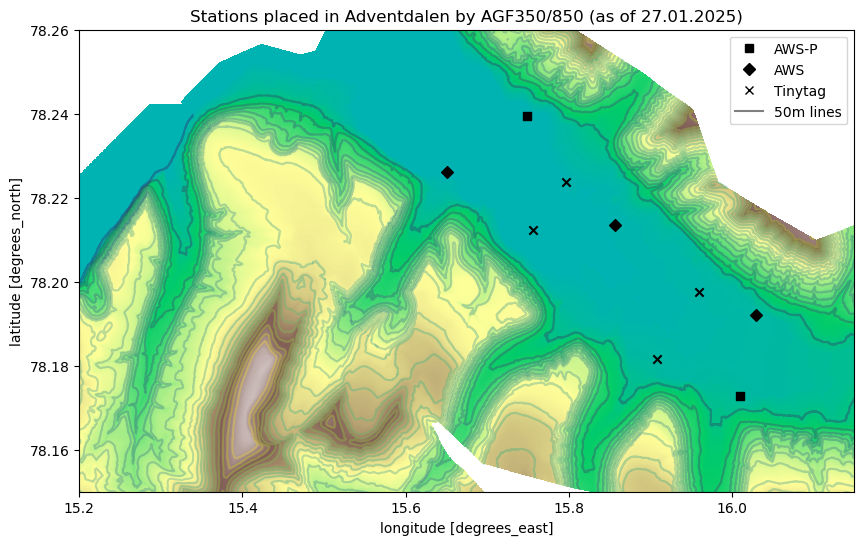

In [6]:
from matplotlib.cm import ScalarMappable

fig,ax = plt.subplots(figsize=(10,6))

DEM1.plot(ax=ax, cmap=new_cmap, vmin=0, vmax=1050, add_colorbar=False)# cbar_kwargs={'label': "Elevation (masl)"})
DEM2.plot(ax=ax, cmap=new_cmap, vmin=0, vmax=1050, add_colorbar=False)

#ax.contour(*np.meshgrid(DEM1.x, DEM1.y), DEM1.data.squeeze(), levels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 10000], color='grey')
#ax.contour(*np.meshgrid(DEM2.x, DEM2.y), DEM2.data.squeeze(), levels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 10000], color='grey')

ax.contour(*np.meshgrid(DEM1.x, DEM1.y), DEM1.data.squeeze(), levels=np.arange(0, 1000, 50), color='grey', alpha=.3)
ax.contour(*np.meshgrid(DEM2.x, DEM2.y), DEM2.data.squeeze(), levels=np.arange(0, 1000, 50), color='grey', alpha=.3)

#ax.contour(*np.meshgrid(DEM1.x, DEM1.y), DEM1.data.squeeze(), levels=np.arange(0, 1000, 10), color='grey', alpha=.2)
#ax.contour(*np.meshgrid(DEM2.x, DEM2.y), DEM2.data.squeeze(), levels=np.arange(0, 1000, 10), color='grey', alpha=.2)

for i in range(len(stations)):
    row = stations.iloc[i]
    if row.Category=='AWS-P': 
        marker='s' #square
        #c='b'
    elif row.Category=='AWS': 
        marker='D' #diamond
        #c='m'
    elif row.Category=='Tinytag': 
        marker='x' #filled x
        #c='orange'

    ax.scatter(row['LON (dec deg)'], row['LAT (dec deg)'], marker=marker, c='k')

ax.legend([Line2D([0], [0], markerfacecolor='k', markeredgecolor='k', lw=0, marker='s'),
           Line2D([0], [0], markerfacecolor='k', markeredgecolor='k', lw=0, marker='D'),
           Line2D([0], [0], markerfacecolor='k', markeredgecolor='k', lw=0, marker='x'),
          Line2D([0], [0], c='grey')],
          ['AWS-P', 'AWS','Tinytag', '50m lines'], loc='upper right')

ax.set_xlim(15.2, 16.15)
ax.set_ylim(78.15, 78.26)

ax.set_title('Stations placed in Adventdalen by AGF350/850 (as of 27.01.2025)')

In [3]:
fnames = ! ls /home/clc/Desktop/svalbard_DEM/*/*2012*.tif
DEM = merge_arrays([rxr.open_rasterio(_) for _ in fnames])

In [ ]:
DEM.plot()

In [47]:
DEM = rxr.open_rasterio('/home/clc/Desktop/svalbard_DEM/NP_S0_DTM5_1990_00000_33/S0_DTM5_1990_00000_33.tif').squeeze()
DEM = DEM.where(DEM>-100)
DEM.x.min()

<xarray.DataArray 'x' ()>
array(414155.)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

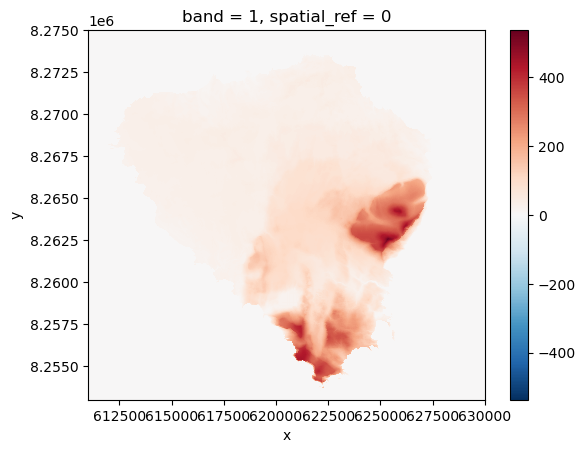

In [40]:
DEM.plot()